In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets

from functions import PCA
from functions import kernelPCA

%matplotlib inline

In [2]:
# define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

# Toy example

## Circles

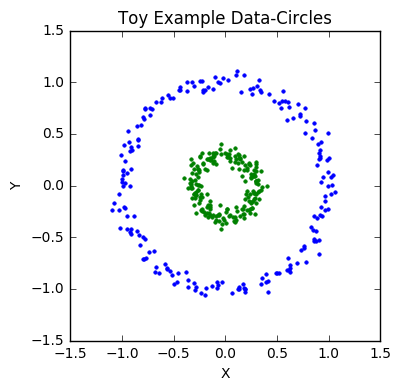

In [3]:
np.random.seed(0)
n_samples = 400
circle, circle_label = datasets.make_circles(n_samples=n_samples, factor=.3, noise=.05)

# visualize the projections
fig, ax = plt.subplots()
for i in range(2):
    tmp = circle[circle_label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5)
    
ax.set_title('Toy Example Data-Circles')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('scaled')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
fig.savefig('./result/circle.png', dpi=300)
plt.show()

### PCA

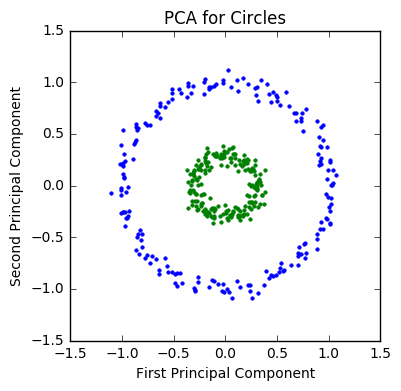

In [4]:
# compute eigenvalues and eigenvectors
eigvals, eigvecs, projection = PCA(circle)

# visualize the projections
fig, ax = plt.subplots()
for i in range(2):
    tmp = projection[circle_label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5)
    
ax.set_title('PCA for Circles')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.axis('scaled')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
fig.savefig('./result/circle_pca.png', dpi=300)
plt.show()

### RBF PCA

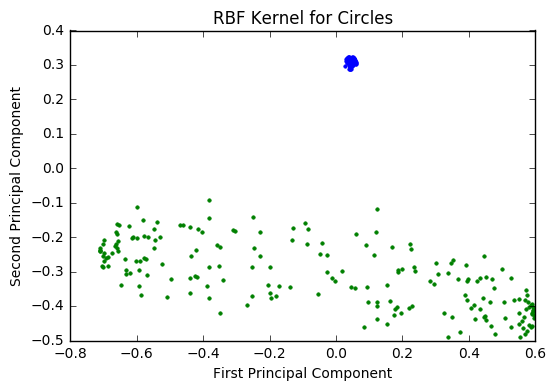

In [5]:
# RBF kernel
eigvals, eigvecs, projection = kernelPCA(circle, kernel='rbf', gamma=10)

# visualize the result
fig, ax = plt.subplots()
for i in range(2):
    tmp = projection[circle_label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5)
    
ax.set_title('RBF Kernel for Circles')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc=1)
fig.savefig('./result/circle_kpca_rbf.png', dpi=300)
plt.show()

## Moons

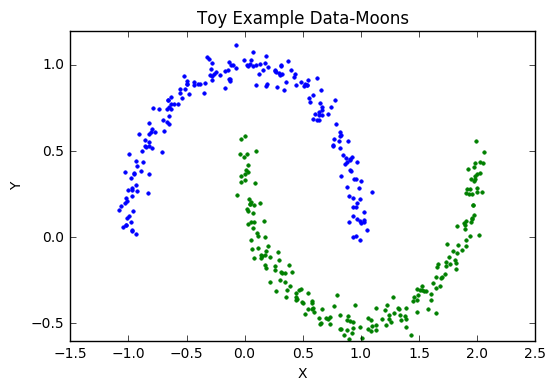

In [6]:
np.random.seed(0)
n_samples = 400
moon, moon_label = datasets.make_moons(n_samples=n_samples, noise=.05)

# visualize the projections
fig, ax = plt.subplots()
for i in range(2):
    tmp = moon[moon_label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5)
    
ax.set_title('Toy Example Data-Moons')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.savefig('./result/moon.png', dpi=300)
plt.show()

### PCA

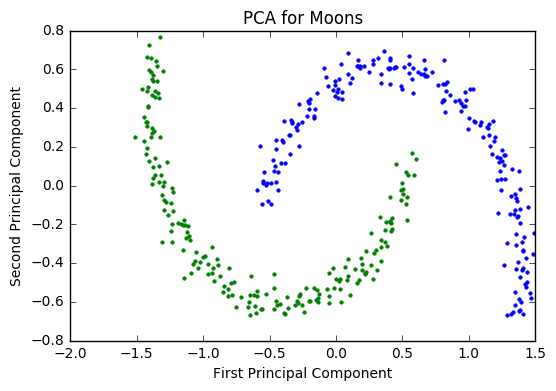

In [7]:
# compute eigenvalues and eigenvectors
eigvals, eigvecs, projection = PCA(moon)

# visualize the projections
fig, ax = plt.subplots()
for i in range(2):
    tmp = projection[moon_label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5)
    
ax.set_title('PCA for Moons')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
fig.savefig('./result/moon_pca.png', dpi=300)
plt.show()

### RBF Kernel

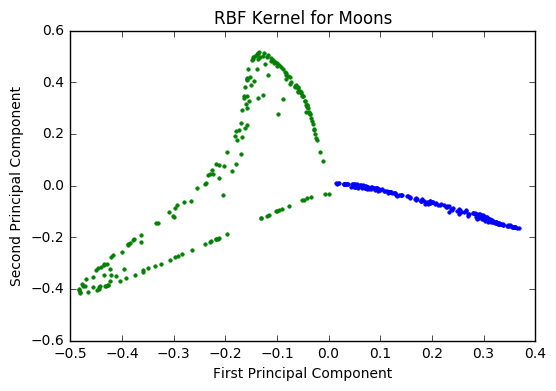

In [8]:
# RBF kernel
eigvals, eigvecs, projection = kernelPCA(moon, kernel='rbf', gamma=20)

# visualize the result
fig, ax = plt.subplots()
for i in range(2):
    tmp = projection[moon_label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5)
    
ax.set_title('RBF Kernel for Moons')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc=1)
fig.savefig('./result/moon_kpca_rbf.png', dpi=300)
plt.show()

# Iris dataset

In [9]:
# load the Iris flower dataset
raw = load_iris()
data = raw.data
label = raw.target

## PCA

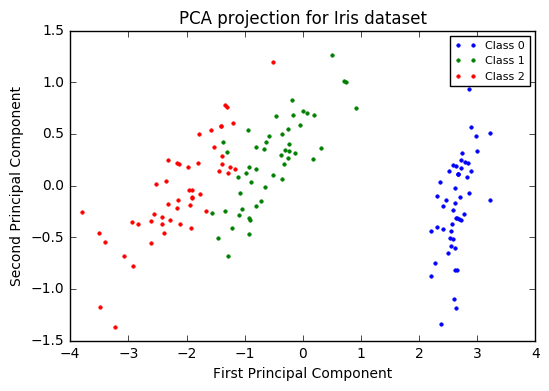

In [10]:
# compute eigenvalues and eigenvectors
eigvals, eigvecs, projection = PCA(data)

# visualize the projections
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('PCA projection for Iris dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
# ax.grid('on')
fig.savefig('./result/iris_pca.png', dpi=300)
plt.show()

## Kernel PCA

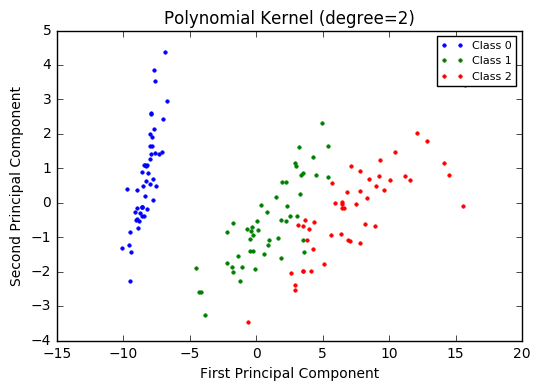

In [11]:
# 2 degree polynomial kernel
eigvals, eigvecs, projection = kernelPCA(data, kernel='polynomial', degree=2, gamma=None)

# visualize the result
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('Polynomial Kernel (degree=2)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc=1)
# ax.grid('on')
fig.savefig('./result/iris_kpca_poly2.png', dpi=300)
plt.show()

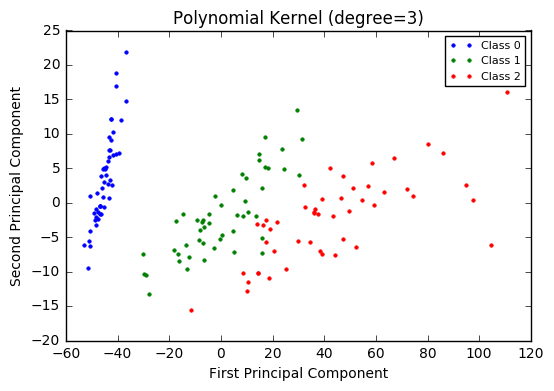

In [12]:
# 3 degree polynomial kernel
eigvals, eigvecs, projection = kernelPCA(data, kernel='polynomial', degree=3, gamma=None)

# visualize the result
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('Polynomial Kernel (degree=3)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc=1)
# ax.grid('on')
fig.savefig('./result/iris_kpca_poly3.png', dpi=300)
plt.show()

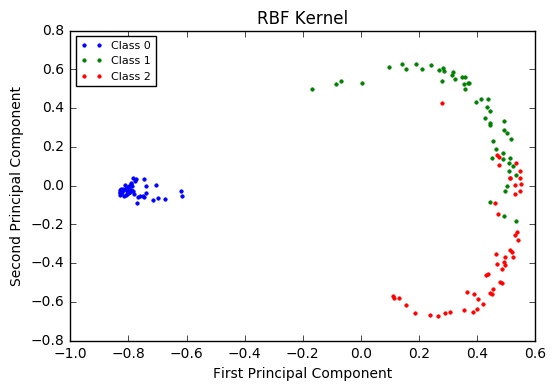

In [13]:
# rbf kernel
eigvals, eigvecs, projection = kernelPCA(data, kernel='rbf', gamma=None)

# visualize the result
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('RBF Kernel')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/iris_kpca_rbf.png', dpi=300)
plt.show()